In [1]:
# Import libraries
import os
import zipfile

# API functions
import requests
import pandas as pd
import datetime

In [2]:
# Define Functions

def get_start_date():
  """Calculates the date for 6 months ago from the current date."""
  today = datetime.date.today()
  return today - datetime.timedelta(days = 30 * 6)  # 30 days in a month

def get_end_date():
  """Returns today's date."""
  today = datetime.date.today()
  return today - datetime.timedelta(days = 1)  # 30 days in a month

In [3]:
# Calculate Dates
start_date = get_start_date()
end_date = get_end_date()

print(start_date)
print(end_date)

2023-09-16
2024-03-13


In [4]:
# Format Dates
formatted_start_date = start_date.strftime("%Y-%m-%dT00:00:00+00:00")
formatted_end_date = end_date.strftime("%Y-%m-%dT23:59:59+00:00")

print(formatted_start_date)
print(formatted_end_date)

2023-09-16T00:00:00+00:00
2024-03-13T23:59:59+00:00


In [5]:
# Build API URL
base_url = "https://api.esios.ree.es/archives"
date_type = "datos"
url = f"{base_url}?start_date={formatted_start_date}&end_date={formatted_end_date}&date_type={date_type}"

print(url)

https://api.esios.ree.es/archives?start_date=2023-09-16T00:00:00+00:00&end_date=2024-03-13T23:59:59+00:00&date_type=datos


In [6]:
# Authentication Setup
api_key = "c965de4dda51fe59aa6c522dcb519ed794e0082a3abe70d73ebd491c463da433"
headers = {
    "Accept": "application/json; application/vnd.esios-api-v1+json",
    "Content-Type": "application/json",
    "x-api-key": api_key
}

# Send API Request
response = requests.get(url, headers = headers)
data = response.json()
print(data)

{'archives': [{'name': 'C2_PrecioFinal', 'id': 187, 'horizon': 'M', 'archive_type': 'zip', 'download': {'name': 'C2_PrecioFinal', 'url': '/archives/187/download?date_type=datos&end_date=2024-03-13T23%3A59%3A59%2B00%3A00&locale=es&start_date=2023-09-16T00%3A00%3A00%2B00%3A00'}, 'date': {'date_type': 'datos', 'start_date': '2023-09-16T00:00:00.000+00:00', 'end_date': '2024-03-13T23:59:59.000+00:00'}, 'date_times': ['2023-09-01', '2024-02-29'], 'publication_date': ['2023-10-10', '2024-03-11'], 'taxonomy_terms': [{'id_taxonomy_term': 155, 'name': 'Generación y consumo', 'vocabulary_id': 20}, {'id_taxonomy_term': 156, 'name': 'Mercados y precios', 'vocabulary_id': 20}, {'id_taxonomy_term': 165, 'name': 'Descargas', 'vocabulary_id': 21}, {'id_taxonomy_term': 168, 'name': 'General', 'vocabulary_id': 22}], 'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'}, {'id_vocabulary': 21, 'name': 'Temática'}, {'id_vocabulary': 22, 'name': 'Área'}]}, {'name': 'REE_BalancingEnerBids', 'id': 181, '

In [7]:
# Accessing the Download Link
download_link = data['archives'][0]['download']['url']
print(download_link)

/archives/187/download?date_type=datos&end_date=2024-03-13T23%3A59%3A59%2B00%3A00&locale=es&start_date=2023-09-16T00%3A00%3A00%2B00%3A00


In [8]:
base_url = "https://api.esios.ree.es"
complete_download_link = f"{base_url}{download_link}"

# Define the data folder path
data_folder = "Data"

# Check if the folder exists, create it if not
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    
# Downloading the Data:
response = requests.get(complete_download_link)

if response.status_code == 200:
    # Download successful!
    data_content = response.content  # Get the downloaded data as bytes

    # Save the data to a file
    with open('Data/downloaded_data.zip', 'wb') as f:
        f.write(data_content)
    print("Data downloaded successfully!")
else:
    print(f"Error downloading data: {response.status_code}")

Data downloaded successfully!


In [9]:
try:
  # Open the zip file
  with zipfile.ZipFile('Data/downloaded_data.zip', 'r') as zip_ref:
    # Extract all files to the data folder
    zip_ref.extractall(data_folder)
    print("Data extracted successfully!")
except zipfile.BadZipFile as e:
  print(f"Error extracting data: {e}")
except Exception as e:  # Catch other potential exceptions
  print(f"Unexpected error: {e}")

Data extracted successfully!


In [17]:
def extract_nested_zip_files(nested_zip_filenames, data_folder, target_filename_pattern):
    extracted_files = []

    for filename in nested_zip_filenames:
        if filename.startswith("C2_PrecioFinal") and filename.endswith(".zip"):
            # Extract nested zip temporarily within data_folder
            nested_zip_file = os.path.join(data_folder, filename)  # Use os.path.join for joining paths
            outer_zip.extract(filename, data_folder)  # Extract using the copied filename

            with zipfile.ZipFile(nested_zip_file, 'r') as inner_zip:
                for inner_info in inner_zip.infolist():
                    if inner_info.filename.startswith(target_filename_pattern) and inner_info.filename.endswith(".xls"):
                        extracted_files.append(inner_info.filename)
                        inner_zip.extract(inner_info.filename, data_folder)

            # os.remove(nested_zip_file)  # Remove the extracted nested zip

    if extracted_files:
        print("Extracted files:")
        for filename in extracted_files:
            print(f"- {filename}")
    else:
        print("No files matching the target pattern were found.")
        
nested_zip_filenames = []
with zipfile.ZipFile('Data/downloaded_data.zip', 'r') as outer_zip:
  for info in outer_zip.infolist():
    if info.filename.startswith("C2_PrecioFinal") and info.filename.endswith(".zip"):
      print(f"Found nested zip file: {info.filename}")  # Print for verification
      nested_zip_filenames.append(info.filename)  # Store filenames
  
  # Define target pattern
  target_filename_pattern = "PFMHORAS_TOD_"
  # Extract files
  extract_nested_zip_files(nested_zip_filenames, data_folder, target_filename_pattern)

Found nested zip file: C2_PrecioFinal_202402.1.zip
Found nested zip file: C2_PrecioFinal_202401.1.zip
Found nested zip file: C2_PrecioFinal_202312.1.zip
Found nested zip file: C2_PrecioFinal_202311.1.zip
Found nested zip file: C2_PrecioFinal_202310.1.zip
Found nested zip file: C2_PrecioFinal_202309.1.zip
Extracted files:
- PFMHORAS_TOD_20240201_20240229.xls
- PFMHORAS_TOD_20240101_20240131.xls
- PFMHORAS_TOD_20231201_20231231.xls
- PFMHORAS_TOD_20231101_20231130.xls
- PFMHORAS_TOD_20231001_20231031.xls
- PFMHORAS_TOD_20230901_20230930.xls


In [18]:
# Getting xls file paths
file_paths = []
for filename in os.listdir(data_folder):
    if filename.startswith("PFMHORAS_TOD_") and filename.endswith(".xls"):  # Adjust filter logic
        file_path = os.path.join(data_folder, filename)
        file_paths.append(file_path)

print(file_paths)

['Data\\PFMHORAS_TOD_20230901_20230930.xls', 'Data\\PFMHORAS_TOD_20231001_20231031.xls', 'Data\\PFMHORAS_TOD_20231101_20231130.xls', 'Data\\PFMHORAS_TOD_20231201_20231231.xls', 'Data\\PFMHORAS_TOD_20240101_20240131.xls', 'Data\\PFMHORAS_TOD_20240201_20240229.xls']


In [26]:
all_data = []  # Empty list to store dataframes
for file_path in file_paths:
    try:
        df = pd.read_excel(file_path, skiprows = 3, header = 0)  # Skip the first Three rows
        all_data.append(df)
    except Exception as e:  # Handling potential errors
        print(f"Error reading file {file_path}: {e}")

combined_df = pd.concat(all_data, ignore_index=True)  # Combine dataframes
combined_df.head()

,Día,Periodo,Energía \nfinal \nMWh,Mercado \ndiario \n€/MWh,Mercado\nintradiario\n€/MWh,Restricciones\n\n€/MWh,Procesos\nOS\n€/MWh,Pagos \ncapacidad\n€/MWh,REER\n\n€/MWh,Liquidación otros conceptos\n(Mecanismo ajuste)\n€/MWh,Importe participación\nservicios\n€/MWh,Total\n\n€/MWh
0,2023-09-01,1,27210.650,119.25,0.00,2.38,0.48,NaN,NaN,0.0,NaN,122.11
1,2023-09-01,2,26214.369,116.25,-0.09,3.21,0.69,NaN,NaN,0.0,NaN,120.05
2,2023-09-01,3,25142.673,109.40,-0.16,3.87,0.92,NaN,NaN,0.0,NaN,114.03
3,2023-09-01,4,24612.054,109.40,-0.21,3.57,1.03,NaN,NaN,0.0,NaN,113.79
4,2023-09-01,5,24430.067,108.72,-0.28,2.98,0.38,NaN,NaN,0.0,NaN,111.80


In [33]:
# Rename column using a dictionary
new_column_names = {"Total\n\n€/MWh": "Total €/MWh"}
combined_df = combined_df.rename(columns=new_column_names)

# Select desired columns
desired_columns = ["Día", "Periodo", "Total €/MWh"]
filtered_df = combined_df[desired_columns]
filtered_df.head()

,Día,Periodo,Total €/MWh
0,2023-09-01,1,122.11
1,2023-09-01,2,120.05
2,2023-09-01,3,114.03
3,2023-09-01,4,113.79
4,2023-09-01,5,111.80


In [35]:
# Check the shape of the DataFrame
print(f"Shape of dataframe: {filtered_df.shape}")

Shape of dataframe: (4369, 3)


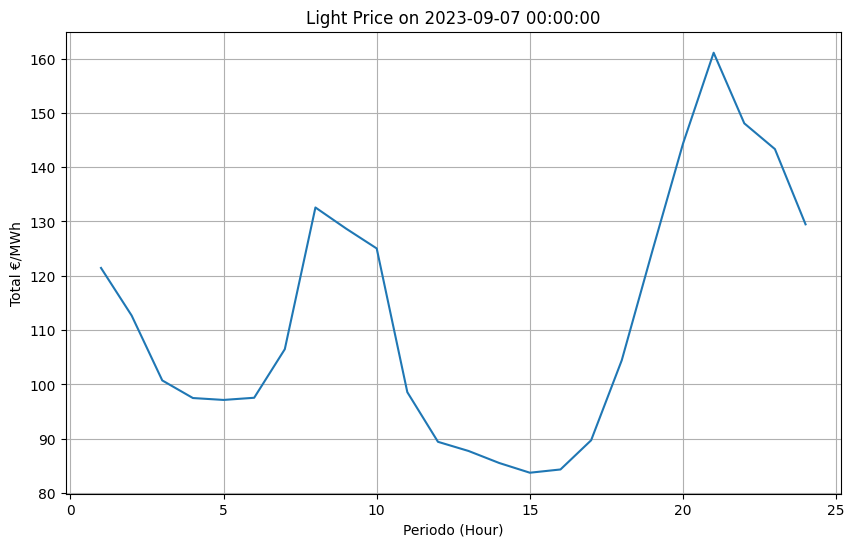

In [52]:
import matplotlib.pyplot as plt

# Selectthe second day NOTICE INDEX = 24
day_chosen = 7
day_to_plot = filtered_df.loc[24 * (day_chosen - 1), "Día"]  # Access Día value from first row

# Filter data for the chosen day
day_data = filtered_df[filtered_df["Día"] == day_to_plot]

# Plot time series
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(day_data["Periodo"], day_data["Total €/MWh"])
plt.xlabel("Periodo (Hour)")
plt.ylabel("Total €/MWh")
plt.title(f"Light Price on {day_to_plot}")
plt.grid(True)
plt.show()

2023-09-01 00:00:00


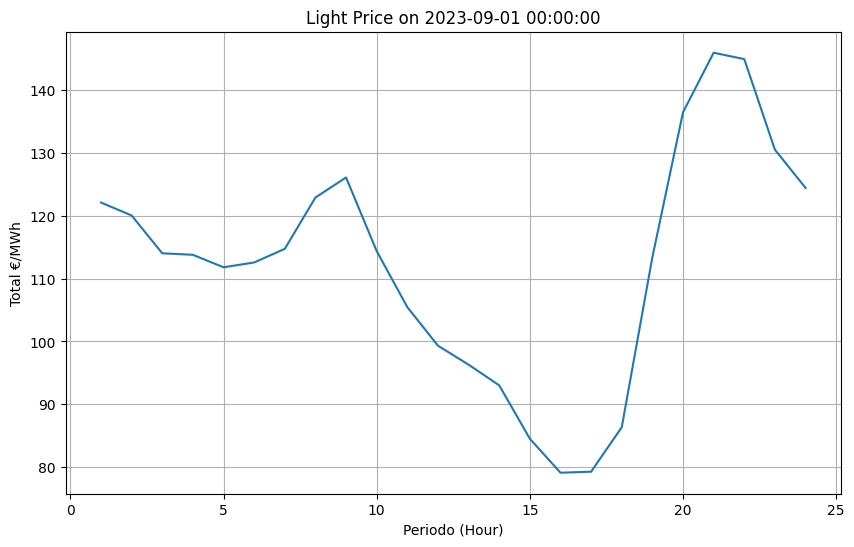

In [47]:
# Select the second day (modify index for other days)
day_to_plot = filtered_df.loc[1, "Día"]  # Access Día value from the second row (index 1)

print(day_to_plot)

# Filter data for the chosen day
day_data = filtered_df[filtered_df["Día"] == day_to_plot]

# Plot time series
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(day_data["Periodo"], day_data["Total €/MWh"])
plt.xlabel("Periodo (Hour)")
plt.ylabel("Total €/MWh")
plt.title(f"Light Price on {day_to_plot}")
plt.grid(True)
plt.show()


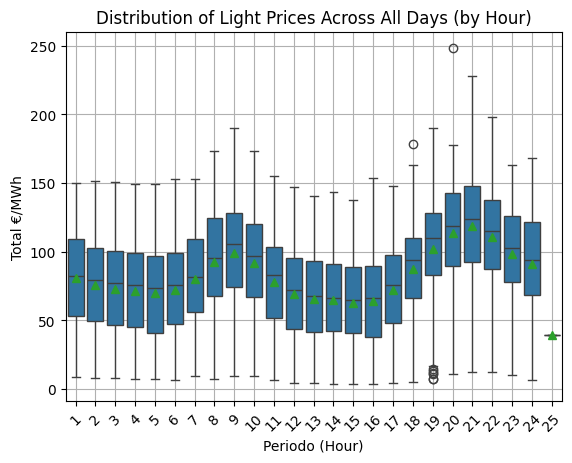

In [39]:
import seaborn as sns

sns.boxplot(
    x = "Periodo",
    y = "Total €/MWh",
    showmeans = True,  # Show mean values for each hour
    data = filtered_df
)
plt.xlabel("Periodo (Hour)")
plt.ylabel("Total €/MWh")
plt.title("Distribution of Light Prices Across All Days (by Hour)")
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

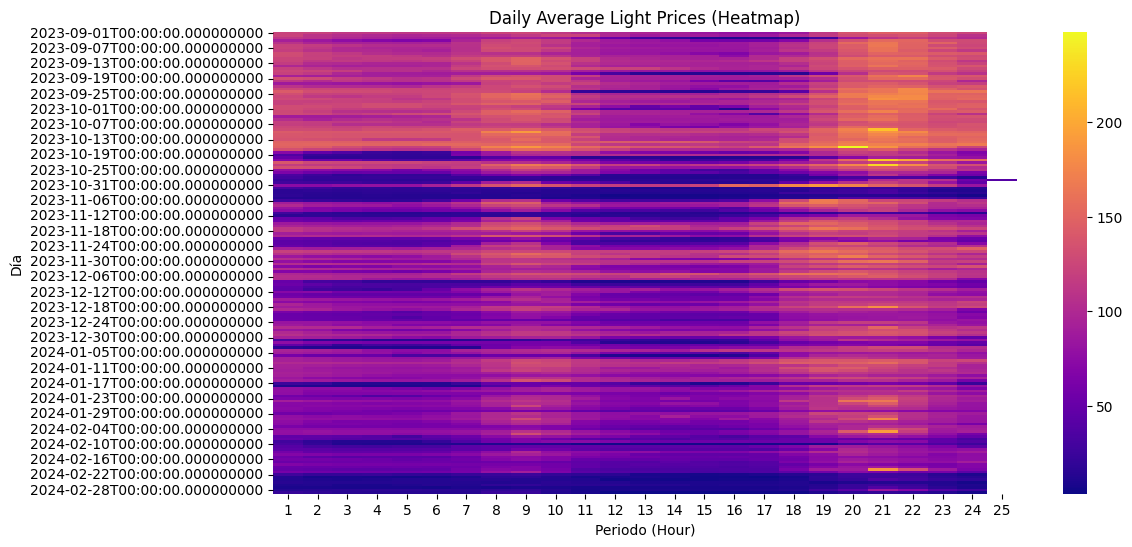

In [45]:
import numpy as np

# Pivot table for daily average price per hour
day_avg_prices = filtered_df.pivot_table(values="Total €/MWh", index="Día", columns="Periodo", aggfunc= "mean")

# Create heatmap
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(day_avg_prices, cmap="plasma")  # Adjust colormap as desired
plt.xlabel("Periodo (Hour)")
plt.ylabel("Día")
plt.title("Daily Average Light Prices (Heatmap)")
plt.show()